<a href="https://colab.research.google.com/github/Akshayextreme/kaggle_fake_news_detector/blob/main/kaggle_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
# Import kaggle json cred file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshayextreme","key":"838885ae90ceede43e2ae07915f84e28"}'}

In [2]:
# kaggle directory structure
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Import kaggle dataset
!kaggle competitions download -c fake-news

  0% 0.00/9.42M [00:00<?, ?B/s]
100% 9.42M/9.42M [00:00<00:00, 155MB/s]
 76% 28.0M/37.0M [00:00<00:00, 150MB/s]
100% 37.0M/37.0M [00:00<00:00, 123MB/s]
  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 41.9MB/s]


In [4]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

2 archives were successfully processed.


In [5]:
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('/content/train.csv')

# EDA

In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train.shape

(20800, 5)

In [ ]:
# Check for balanced dataset
train.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [ ]:
# Null value check
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

## Authors

In [ ]:
# Total unique authors
len(train['author'].unique())

4202

In [ ]:
df_author = train.groupby('author').count().reset_index()[['author','label']]
df_author.columns = ['Author', 'Total_articles_written']
df_author.head()

,Author,Total_articles_written
0,# 1 NWO Hatr,17
1,-NO AUTHOR-,54
2,10 Habits That Will Make Your Life Easier &amp...,1
3,10 More Beautiful Images That Remind You We St...,1
4,10 Movies That Could Change Your Understanding...,1


In [ ]:
df_author['Fake_articles'] = train.groupby('author').sum().reset_index()['label']
df_author['Percentage_fake_article'] = (df_author['Fake_articles'] / df_author['Total_articles_written']) * 100
df_author.head()

,Author,Total_articles_written,Fake_articles,Percentage_fake_article
0,# 1 NWO Hatr,17,17,100.0
1,-NO AUTHOR-,54,54,100.0
2,10 Habits That Will Make Your Life Easier &amp...,1,1,100.0
3,10 More Beautiful Images That Remind You We St...,1,1,100.0
4,10 Movies That Could Change Your Understanding...,1,1,100.0


In [ ]:
df_author.shape

(4201, 4)

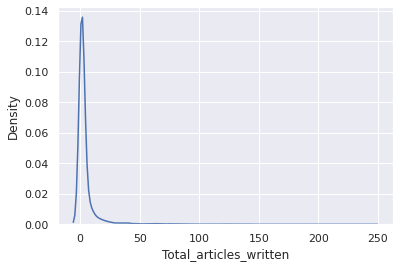

In [ ]:
sns.kdeplot(df_author['Total_articles_written'])

In [ ]:
# Checking 95% percentile of total number of news article written per author
df_author['Total_articles_written'].quantile(0.95)

17.0

In [ ]:
# Finding important authors based on number of articles written
df_imp_author = df_author[df_author['Total_articles_written'] >= 17].reset_index().drop('index',axis=1)
df_imp_author.head()

,Author,Total_articles_written,Fake_articles,Percentage_fake_article
0,# 1 NWO Hatr,17,17,100.0
1,-NO AUTHOR-,54,54,100.0
2,AWR Hawkins,107,0,0.0
3,Aaron Kesel,25,25,100.0
4,Aaron Klein,54,0,0.0


In [ ]:
df_imp_author['Percentage_fake_article'].value_counts()

0.000000      115
100.000000    107
0.411523        1
23.809524       1
Name: Percentage_fake_article, dtype: int64

In [ ]:
# Author who always wrote fake news
Fake_news_author = df_imp_author['Author'][df_imp_author['Percentage_fake_article'] > 25].values
print('Fake news authors : {}'.format(list(Fake_news_author)))

Fake news authors : ['# 1 NWO Hatr', '-NO AUTHOR-', 'Aaron Kesel', 'Activist Post', 'Admin', 'Admin - Orissa', 'Alex Ansary', 'Amanda Froelich', 'Amanda Shea', 'Amy Moreno', 'Andrew Anglin', 'Anonymous', 'Ariana', 'Arnaldo Rodgers', 'Arnold Monteverde (noreply@blogger.com)', 'Author', 'BareNakedIslam', 'Brianna Acuesta', 'C.E. Dyer', 'Carol Adl', 'Colin Taylor', 'Colm Williamson', 'Consortiumnews.com', 'Contributing Author', 'Corbett', 'Daily Bell Staff', 'Daisy Luther', 'Daniel Greenfield', 'Dave Hodges', 'David Stockman', 'Dikran Arakelian (noreply@blogger.com)', 'Doug P.', 'Dr. Patrick Slattery', 'EdJenner', 'Eddy Lavine', 'Editor', 'Edmondo Burr', 'Geoffrey Grider', 'Gerry McBride', 'Gillian', 'Grant Stern', 'Guest', 'Heather Callaghan', 'Henry Wolff', 'Howard Portnoy', 'IWB', 'Iron Sheik', 'J.E. Dyer', 'Jafe Arnoldski (noreply@blogger.com)', 'Jameson Parker', 'Jason Ditz', 'Jason Easley', 'Julius Hubris', 'Kaitlyn Stegall', 'Kevin Gosztola', 'King World News', 'Lance Schuttler', '

## Titles

In [11]:
import regex as re
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Word cloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Filling Null values
train.fillna('Not Available', inplace=True)

In [13]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [14]:
def cleaning(text):
    text = re.sub('[^a-z,A-Z]', ' ', text).lower().split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    return ' '.join(text)

In [15]:
def leng_txt(x):
    in_ids = x.split()
    return len(in_ids)

In [16]:
df_title = pd.DataFrame()
df_title['Titles'] = train['title'].apply(cleaning)
df_title['Label'] = train['label']

In [ ]:
df_title['Total_length'] = df_title['Titles'].apply(leng_txt)
df_title.head()

,Titles,Label,Total_length
0,hous dem aid even see comey letter jason chaff...,1,10
1,"flynn hillari clinton, big woman campu breitbart",0,7
2,truth might get fire,1,4
3,civilian kill singl us airstrik identifi,1,6
4,iranian woman jail fiction unpublish stori wom...,1,10


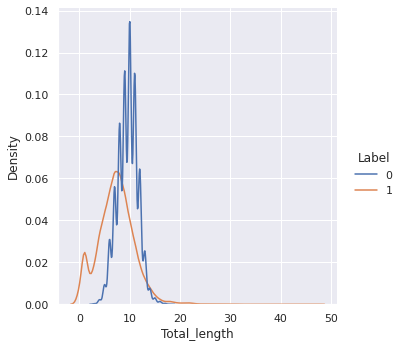

In [ ]:
sns.displot(data=df_title[['Total_length', 'Label']], x="Total_length", hue="Label", kind="kde")

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
list_titles = list(df_title['Titles'].values)
corpus = " ".join(list_titles)

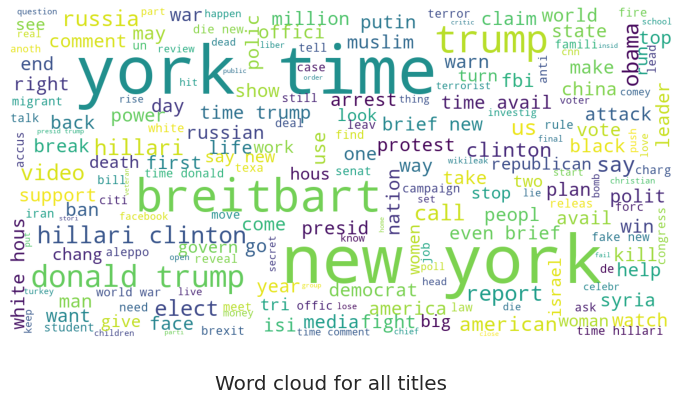

In [ ]:
show_wordcloud(corpus, title='Word cloud for all titles')

In [ ]:
fake_titles = list(df_title['Titles'][df_title['Label'] == 1].values)
fake_corpus = " ".join(fake_titles)

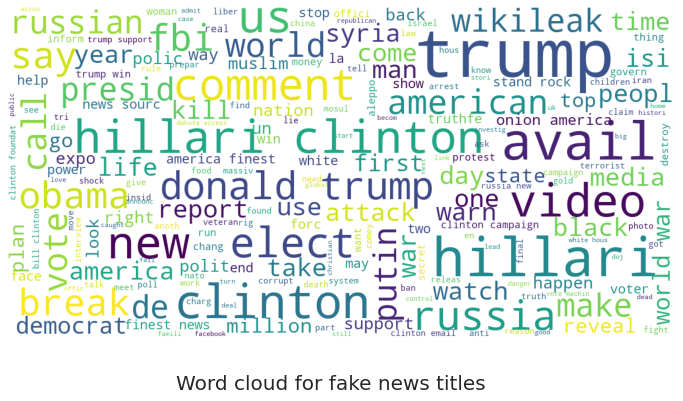

In [ ]:
show_wordcloud(fake_corpus, title='Word cloud for fake news titles')

In [ ]:
real_titles = list(df_title['Titles'][df_title['Label'] == 0].values)
real_corpus = " ".join(real_titles)

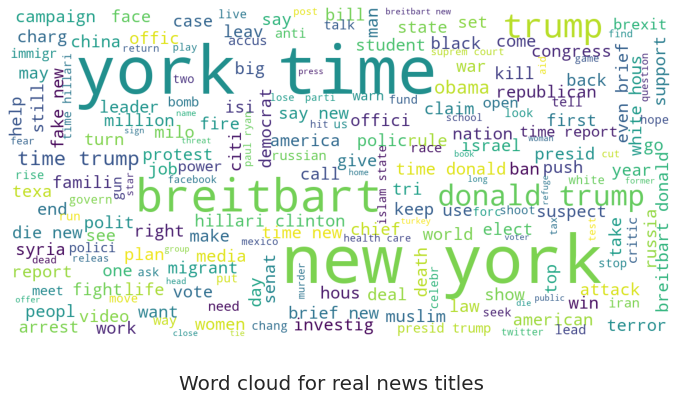

In [ ]:
show_wordcloud(real_corpus, title='Word cloud for real news titles')

## Text

In [ ]:
df_text = pd.DataFrame()
df_text['Text'] = train['text'].apply(cleaning)
df_text['Label'] = train['label']

In [ ]:
df_text['Total_length'] = df_text['Text'].apply(leng_txt)
df_text.head()

,Text,Label,Total_length
0,hous dem aid even see comey letter jason chaff...,1,440
1,ever get feel life circl roundabout rather hea...,0,375
2,"truth might get fire octob , tension intellig ...",1,706
3,video civilian kill singl us airstrik identifi...,1,305
4,print iranian woman sentenc six year prison ir...,1,88


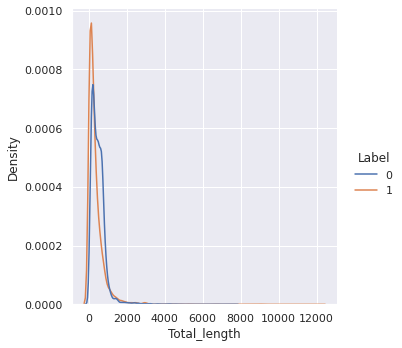

In [ ]:
sns.displot(data=df_text[['Total_length', 'Label']], x="Total_length", hue="Label", kind="kde")

In [ ]:
list_text = list(df_text['Text'].values)
corpus = " ".join(list_text)

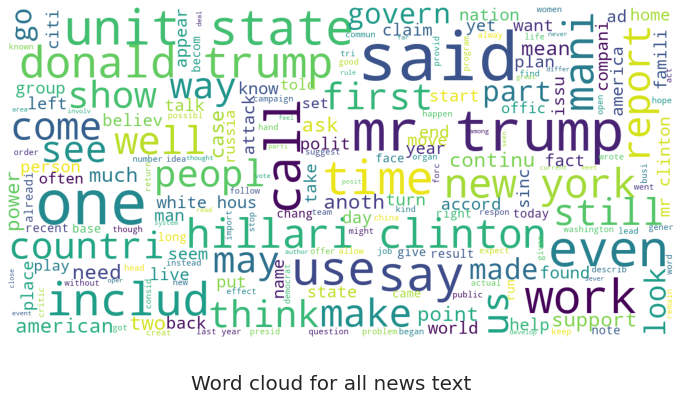

In [ ]:
show_wordcloud(corpus, title='Word cloud for all news text')

In [ ]:
fake_text = list(df_text['Text'][df_text['Label'] == 1].values)
fake_corpus = " ".join(fake_text)

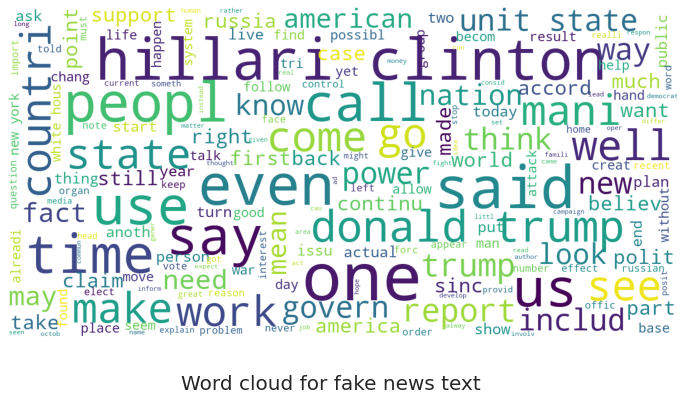

In [ ]:
show_wordcloud(fake_corpus, title='Word cloud for fake news text')

In [ ]:
real_text = list(df_text['Text'][df_text['Label'] == 0].values)
real_corpus = " ".join(real_text)

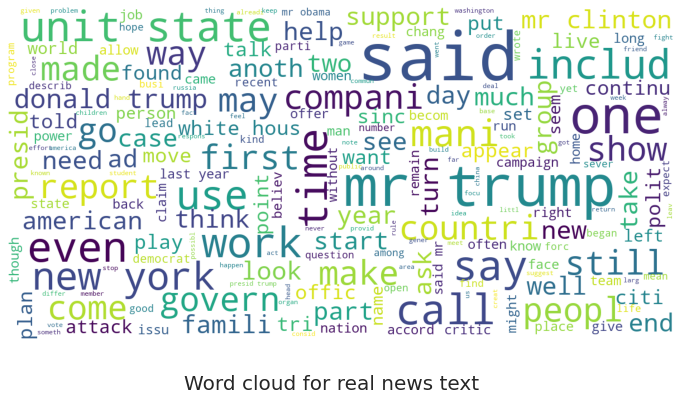

In [ ]:
show_wordcloud(real_corpus, title='Word cloud for real news text')

# Model training

## Logistic Regression

### Considering only "News Title" feature

In [7]:
import numpy as np
import regex as re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report

In [8]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
train.fillna('Not Available', inplace=True)

In [10]:
y = train['label'].values

In [11]:
for col in ['title']:
    train[col] = train[col].apply(lambda x : re.sub('[^a-z,A-Z]', ' ', x).lower())

train.head()

,id,title,author,text,label
0,0,house dem aide we didn t even see comey s let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"flynn hillary clinton, big woman on campus ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,civilians killed in single us airstrike hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
# tf-idf vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train['title'].values)

print(X.shape)

(20800, 5000)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [14]:
# Logistic Regression with default parameter value
LogisticModel = LogisticRegression(solver='liblinear')

In [15]:
LogisticModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = LogisticModel.predict(X_test)

In [18]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2727
           1       0.99      0.89      0.94      3513

    accuracy                           0.93      6240
   macro avg       0.93      0.94      0.93      6240
weighted avg       0.94      0.93      0.93      6240



[[2695  385]
 [  32 3128]]


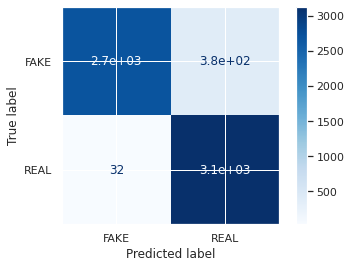

In [19]:
clf = plot_confusion_matrix(LogisticModel, X_test, y_test,
                      display_labels=['FAKE', 'REAL'],
                      cmap=plt.cm.Blues,
                      normalize=None)

print(clf.confusion_matrix)

plt.show()

### Considering all features

In [20]:
train.head()

,id,title,author,text,label
0,0,house dem aide we didn t even see comey s let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"flynn hillary clinton, big woman on campus ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,civilians killed in single us airstrike hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [21]:
train.fillna('Not Available', inplace=True)

In [22]:
y = train['label'].values

In [23]:
for col in ['title', 'author', 'text']:
    train[col] = train[col].apply(lambda x : re.sub('[^a-z,A-Z]', ' ', x).lower())

train.head()

,id,title,author,text,label
0,0,house dem aide we didn t even see comey s let...,darrell lucus,house dem aide we didn t even see comey s let...,1
1,1,"flynn hillary clinton, big woman on campus ...",daniel j flynn,ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,consortiumnews com,"why the truth might get you fired october , ...",1
3,3,civilians killed in single us airstrike hav...,jessica purkiss,videos civilians killed in single us airstr...,1
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print an iranian woman has been sentenced to ...,1


In [24]:
# Considering all features
train['total'] = train['title'] + ' ' + train['author'] + ' ' + train['text']

In [25]:
# tf-idf
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train['total'].values)

print(X.shape)

(20800, 5000)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [27]:
# Logistic Regression with default parameter value
LogisticModel = LogisticRegression(C=1, solver='liblinear')

In [28]:
LogisticModel.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = LogisticModel.predict(X_test)

In [30]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3054
           1       0.96      0.96      0.96      3186

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



[[2943  137]
 [ 111 3049]]


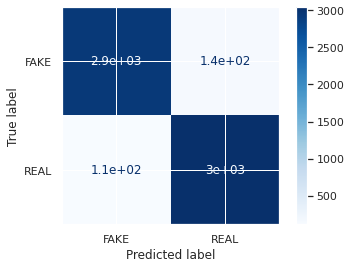

In [31]:
clf = plot_confusion_matrix(LogisticModel, X_test, y_test,
                      display_labels=['FAKE', 'REAL'],
                      cmap=plt.cm.Blues,
                      normalize=None)

print(clf.confusion_matrix)

plt.show()

#### Hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Paramater grid for C : Inverse of regularization strength
param_grid = {'C' : [1e-1, 1, 1e1, 1e2, 1e3, 1e4]}

LogisticModel = LogisticRegression(solver='liblinear')

In [34]:
# Exhaustive search over C with 5 cross validation split
clf = GridSearchCV(LogisticModel, param_grid, scoring='accuracy', n_jobs = -1, cv = 5)

In [35]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10.0, 100.0, 1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
# Best accuracy & value of C
print("Best score: {} \nBest parameters: {}".format(clf.best_score_, clf.best_params_))

Best score: 0.9677884615384615 
Best parameters: {'C': 100.0}


In [37]:
y_pred = clf.predict(X_test)

In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3079
           1       0.97      0.97      0.97      3161

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



[[2973  107]
 [ 106 3054]]


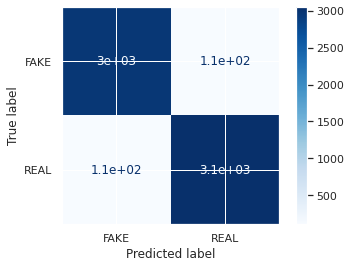

In [39]:
cnf = plot_confusion_matrix(clf, X_test, y_test,
                      display_labels=['FAKE', 'REAL'],
                      cmap=plt.cm.Blues,
                      normalize=None)

print(cnf.confusion_matrix)

plt.show()

## Randome Forest Classifier

### Considering all feaures

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# RandomForest with default parameter value
RF_model = RandomForestClassifier(n_jobs=2)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [42]:
y_pred = RF_model.predict(X_test)

In [43]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3077
           1       0.98      0.98      0.98      3163

    accuracy                           0.98      6240
   macro avg       0.98      0.98      0.98      6240
weighted avg       0.98      0.98      0.98      6240



[[3001   79]
 [  76 3084]]


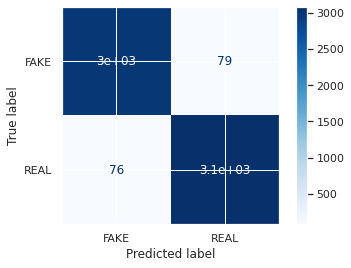

In [44]:
clf = plot_confusion_matrix(RF_model, X_test, y_test,
                      display_labels=['FAKE', 'REAL'],
                      cmap=plt.cm.Blues,
                      normalize=None)

print(clf.confusion_matrix)

plt.show()

## Distil-BERT

### Considering only "News Title" feature

In [45]:
train.head()

,id,title,author,text,label,total
0,0,house dem aide we didn t even see comey s let...,darrell lucus,house dem aide we didn t even see comey s let...,1,house dem aide we didn t even see comey s let...
1,1,"flynn hillary clinton, big woman on campus ...",daniel j flynn,ever get the feeling your life circles the rou...,0,"flynn hillary clinton, big woman on campus ..."
2,2,why the truth might get you fired,consortiumnews com,"why the truth might get you fired october , ...",1,why the truth might get you fired consortiumne...
3,3,civilians killed in single us airstrike hav...,jessica purkiss,videos civilians killed in single us airstr...,1,civilians killed in single us airstrike hav...
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print an iranian woman has been sentenced to ...,1,iranian woman jailed for fictional unpublished...


In [ ]:
!pip install transformers

In [48]:
import torch
from torch.utils.data import Dataset, DataLoader

from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [49]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [50]:
def leng_txt(x):
    in_ids = tokenizer.encode(x, add_special_tokens=True)
    return len(in_ids)

In [51]:
train['length'] = train.title.apply(leng_txt)

In [52]:
train.length.quantile(0.95)

24.0

In [53]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.data = dataframe
        self.text = dataframe.title
        self.targets = dataframe.label
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.text)

    def __getitem__(self, idx):
        text = str(self.text[idx])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[idx], dtype=torch.long)
        }

In [54]:
MAX_LEN = 25
train_size = 0.8
train_dataset=train.sample(frac=train_size,random_state=648)
val_dataset=train.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(train.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(val_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
validation_set = CustomDataset(val_dataset, tokenizer, MAX_LEN)

FULL Dataset: (20800, 7)
TRAIN Dataset: (16640, 7)
TEST Dataset: (4160, 7)


In [55]:
TRAIN_BATCH_SIZE = 64
VALID_BATCH_SIZE = 32

train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 4
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': False,
                'num_workers': 4
                }

training_loader = DataLoader(training_set, **train_params)
validation_loader = DataLoader(validation_set, **test_params)

In [ ]:
# DistilBert
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

# Tell pytorch to run this model on the GPU.
model.to(device)

In [57]:
LEARNING_RATE = 1e-05
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [58]:
def train(epoch):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for i, data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        loss, outputs = model(ids, mask, labels=targets) # DistilBert
        preds = torch.argmax(outputs, 1)

        optimizer.zero_grad()

        #Statistics
        running_loss += loss.item()
        running_corrects += torch.sum(preds == targets.data)
        
        optimizer.zero_grad()
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    epoch_loss = running_loss / training_set.__len__()
    epoch_acc = running_corrects.double() / training_set.__len__()
    print(f'Train -> Epoch: {epoch}, Loss: {epoch_loss}, Accuracy: {epoch_acc}')

In [59]:
def validation(epoch):
    model.eval()
    running_loss = 0.0
    log_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for _, data in enumerate(validation_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)

            loss, outputs = model(ids, mask, labels=targets) #DistilBert
            preds = torch.argmax(outputs, 1)

            running_loss += loss.item()
            running_corrects += torch.sum(preds == targets.data)
        
        epoch_loss = running_loss / validation_set.__len__()
        epoch_acc = running_corrects.double() / validation_set.__len__()

        print(f'Valid -> Epoch: {epoch}, Loss: {epoch_loss}, Accuracy: {epoch_acc}')
        print('\n ==================================================================== \n')
        return epoch_acc

In [60]:
import copy
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

EPOCHS = 10

for epoch in range(EPOCHS):
    train(epoch)
    epoch_acc = validation(epoch)
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())

model.load_state_dict(best_model_wts)
print(f'Best Valid Acc: {best_acc}')

Train -> Epoch: 0, Loss: 0.004101351010523593, Accuracy: 0.8885817307692309
Valid -> Epoch: 0, Loss: 0.00502913894597441, Accuracy: 0.930048076923077


Train -> Epoch: 1, Loss: 0.002183680504318685, Accuracy: 0.9440504807692308
Valid -> Epoch: 1, Loss: 0.004098076139612553, Accuracy: 0.9461538461538462


Train -> Epoch: 2, Loss: 0.001618991839103938, Accuracy: 0.9609375
Valid -> Epoch: 2, Loss: 0.004173291269734573, Accuracy: 0.9495192307692308


Train -> Epoch: 3, Loss: 0.001107779760353039, Accuracy: 0.9754807692307693
Valid -> Epoch: 3, Loss: 0.004430776772082586, Accuracy: 0.9492788461538462


Train -> Epoch: 4, Loss: 0.000827087934843663, Accuracy: 0.9828125000000001
Valid -> Epoch: 4, Loss: 0.005256410495712771, Accuracy: 0.9487980769230769


Train -> Epoch: 5, Loss: 0.0005649444535265502, Accuracy: 0.9887019230769232
Valid -> Epoch: 5, Loss: 0.00568633531186676, Accuracy: 0.9516826923076923


Train -> Epoch: 6, Loss: 0.0003661217324896335, Accuracy: 0.9926682692307693
Valid -> E

In [61]:
def predict(loader):
    model.eval()
    prediction = []

    with torch.no_grad():
        for _, data in enumerate(loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)

            loss, outputs = model(ids, mask, labels=targets) #DistilBert
            preds = torch.argmax(outputs, 1)

            prediction.append(preds.detach().cpu().numpy())
        return prediction

In [62]:
tmp = predict(validation_loader)
y_pred = [j for i in tmp for j in i]

In [63]:
y_test = val_dataset.label.values

In [ ]:
print("Validation Accuracy: {:.2f} \nValidation Precision: {:.2f} \nValidation Recall: {:.2f}".format(
    accuracy_score(y_pred, y_test),
    precision_score(y_pred, y_test),
    recall_score(y_pred, y_test)
))

Validation Accuracy: 0.95 Validation Precision: 0.96 Validation Recall: 0.94


In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2070
           1       0.95      0.95      0.95      2090

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1968,  102],
       [  99, 1991]])

# Model Prediction

In [66]:
test = pd.read_csv('/content/test.csv')

In [67]:
test.fillna('Not Available', inplace=True)

In [68]:
# Cleaning text from test dataset
for col in ['title', 'author', 'text']:
    test[col] = test[col].apply(lambda x : re.sub('[^a-z,A-Z]', ' ', x).lower())

test.head()

,id,title,author,text
0,20800,"specter of trump loosens tongues, if not purse...",david streitfeld,"palo alto, calif after years of scorning..."
1,20801,russian warships ready to strike terrorists ne...,not available,russian warships ready to strike terrorists ne...
2,20802,nodapl native american leaders vow to stay a...,common dreams,videos nodapl native american leaders vow to...
3,20803,"tim tebow will attempt another comeback, this ...",daniel victor,"if at first you don t succeed, try a different..."
4,20804,keiser report meme wars e,truth broadcast network,mins ago views comments likes for th...


In [69]:
# Considering all features
test['total'] = test['title'] + ' ' + test['author'] + ' ' + test['text']

In [70]:
# Using already trained vectorizer to create vectors
X_act_test = vectorizer.transform(test['total'].values)

In [71]:
# Using trained RandomForest model for prediction
y_act_pred = RF_model.predict(X_act_test)

In [72]:
submission = pd.DataFrame(y_act_pred, columns=['label'])
submission['id'] = test['id']
submission.groupby('label').count()

,id
label,
0,2612
1,2588


In [73]:
submission.head()

,label,id
0,0,20800
1,1,20801
2,1,20802
3,0,20803
4,1,20804


In [74]:
submission.to_csv('submission.csv', index = False)